In [144]:
#Loading the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

In [145]:
#Loading our dataset
df = pd.read_csv ('./POlitical_fact_chekcer_data_set.csv', index_col = 0, dtype = str)
df.head()

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,Paul,“North Carolina ranks last in the country in K...,North Carolina state House Democratic Caucus,"April 7, 2023",barely-true,FAKE,0
1,Jeff,"""Vitamins aren’t FDA approved, but Twinkies are.”",Facebook posts,"April 7, 2023",barely-true,FAKE,0
2,Loreben,There have been no new variants since Dr. Anth...,Instagram posts,"April 7, 2023",false,FAKE,0
3,Grace,“Florida man charged with a hate crime” for de...,Tweets,"April 7, 2023",barely-true,FAKE,0
4,Sara,Pouring soda on raw pork will cause parasites ...,Facebook posts,"April 7, 2023",pants-fire,FAKE,0


In [146]:
#We will explore a bit our dataset
df.shape

(23600, 7)

In [147]:
#We will do a general statistic on it
df.describe()

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
count,23600,23520,23520,23600,23520,23600,23600
unique,145,4767,761,867,9,2,2
top,Ciara,On confirming a Supreme Court justice nominee ...,Facebook posts,"February 23, 2023",false,FAKE,0
freq,5461,10,7037,90,12214,22866,22866


In [148]:
#Let's see how many fake news we have
df.BinaryNumTarget.value_counts()

0    22866
1      734
Name: BinaryNumTarget, dtype: int64

In [149]:
# We need to preprocess the data
df = df.drop(['target', 'BinaryNumTarget', 'date'], axis = 1)

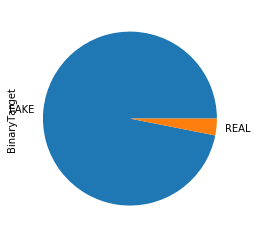

In [150]:
#Let's see it this time using a pie plot
df.BinaryTarget.value_counts(normalize = True).plot.pie()

In [151]:
#We need to know how many null value we have 
df['BinaryTarget'].isnull().value_counts()

False    23600
Name: BinaryTarget, dtype: int64

In [152]:
#Now we need to clean our data
import string

In [153]:
#What is punctuation?
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [154]:
#We will remove punctuations, And we will turn our text to lowerCase from our dataFrame
df['statement'] = df['statement'].str.replace(r'[^\w\s]+', '')
df['statement'] = df['statement'].str.lower()
df['author'] = df['author'].str.lower()
df['source'] = df['source'].str.lower()
df['BinaryTarget'] = df['BinaryTarget'].str.lower()

In [155]:
df.head()

,author,statement,source,BinaryTarget
0,paul,north carolina ranks last in the country in k1...,north carolina state house democratic caucus,fake
1,jeff,vitamins arent fda approved but twinkies are,facebook posts,fake
2,loreben,there have been no new variants since dr antho...,instagram posts,fake
3,grace,florida man charged with a hate crime for defa...,tweets,fake
4,sara,pouring soda on raw pork will cause parasites ...,facebook posts,fake


In [156]:
#Then, We need to apply the tokenization which means turning our text to separeted strings
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [139]:
#When I wanted to apply the tokenization , i had a problem with null values. So here I am removing null values
df['statement'] = df["statement"].dropna(inplace=True)

# convert the column to string
df['statement'] = df['statement'].astype(str)
#df['statement'] = pd.Series(df['statement'], dtype = "string")
#df['statement'] = df.statement.apply(str)

In [163]:
df.isnull().sum()

author           0
statement       80
source          80
BinaryTarget     0
dtype: int64

In [164]:
df = df.dropna(how='any',axis=0) 

In [166]:
df.shape

(23520, 4)

In [173]:
def tokenize(our_statement):
    tokens = word_tokenize(our_statement)
    return tokens
df['statement_tokenized'] = df['statement'].apply(lambda x: tokenize(x))

df.head()

,author,statement,source,BinaryTarget,statement_tokenized,statement_without_stopwords
0,paul,north carolina ranks last in the country in k1...,north carolina state house democratic caucus,fake,"[north, carolina, ranks, last, in, the, countr...","[north, carolina, ranks, last, country, k12, f..."
1,jeff,vitamins arent fda approved but twinkies are,facebook posts,fake,"[vitamins, arent, fda, approved, but, twinkies...","[vitamins, arent, fda, approved, twinkies]"
2,loreben,there have been no new variants since dr antho...,instagram posts,fake,"[there, have, been, no, new, variants, since, ...","[new, variants, since, dr, anthony, fauci, ret..."
3,grace,florida man charged with a hate crime for defa...,tweets,fake,"[florida, man, charged, with, a, hate, crime, ...","[florida, man, charged, hate, crime, defacing,..."
4,sara,pouring soda on raw pork will cause parasites ...,facebook posts,fake,"[pouring, soda, on, raw, pork, will, cause, pa...","[pouring, soda, raw, pork, cause, parasites, e..."


In [174]:
#Now we move on to removing our stopWords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
stopwords_En = nltk.corpus.stopwords.words('english')

In [176]:
#Removing stopwords using a function
def remove_stopwords(our_statement_tokenized):
    text = [word for word in our_statement_tokenized if word not in stopwords_En]
    return text

df['statement_without_stopwords'] = df['statement_tokenized'].apply(lambda x: remove_stopwords(x))

df.head(200)



,author,statement,source,BinaryTarget,statement_tokenized,statement_without_stopwords
0,paul,north carolina ranks last in the country in k1...,north carolina state house democratic caucus,fake,"[north, carolina, ranks, last, in, the, countr...","[north, carolina, ranks, last, country, k12, f..."
1,jeff,vitamins arent fda approved but twinkies are,facebook posts,fake,"[vitamins, arent, fda, approved, but, twinkies...","[vitamins, arent, fda, approved, twinkies]"
2,loreben,there have been no new variants since dr antho...,instagram posts,fake,"[there, have, been, no, new, variants, since, ...","[new, variants, since, dr, anthony, fauci, ret..."
3,grace,florida man charged with a hate crime for defa...,tweets,fake,"[florida, man, charged, with, a, hate, crime, ...","[florida, man, charged, hate, crime, defacing,..."
4,sara,pouring soda on raw pork will cause parasites ...,facebook posts,fake,"[pouring, soda, on, raw, pork, will, cause, pa...","[pouring, soda, raw, pork, cause, parasites, e..."
5,gabrielle,a video shows florida gov ron desantis saying ...,tiktok posts,fake,"[a, video, shows, florida, gov, ron, desantis,...","[video, shows, florida, gov, ron, desantis, sa..."
6,sara,a doctor tweeted that she doesnt regret giving...,instagram posts,fake,"[a, doctor, tweeted, that, she, doesnt, regret...","[doctor, tweeted, doesnt, regret, giving, covi..."
7,jeff,report proves that covid19 vaccines caused 300...,instagram posts,fake,"[report, proves, that, covid19, vaccines, caus...","[report, proves, covid19, vaccines, caused, 30..."
8,madison,president trump is officially a political pris...,tom fitton,fake,"[president, trump, is, officially, a, politica...","[president, trump, officially, political, pris..."
9,amy,regarding trumps january 2021 telephone call w...,donald trump,fake,"[regarding, trumps, january, 2021, telephone, ...","[regarding, trumps, january, 2021, telephone, ..."


In [177]:
#Last but not least, we are about to apply the Limmatizer technic: in order for us to group words from the same family in one root word so the classification later become easier
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [178]:
wn = nltk.WordNetLemmatizer()

In [ ]:
def lemmatizing(our_statement_tokenized):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df[''] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

df.head(10)